#                  IPL Analysis Data science project

In [1]:
import pandas as pd
# import data set
matches = pd.read_csv("/Users/rajsa/OneDrive/Desktop/matches.csv")
deliveries = pd.read_csv("/Users/rajsa/OneDrive/Desktop/deliveries.csv")

print(matches.head())
print("\n")
print("enter top  rows of the delivieries")
print(deliveries.head())

       id   season        city       date match_type player_of_match  \
0  335982  2007/08   Bangalore  4/18/2008     League     BB McCullum   
1  335983  2007/08  Chandigarh  4/19/2008     League      MEK Hussey   
2  335984  2007/08       Delhi  4/19/2008     League     MF Maharoof   
3  335985  2007/08      Mumbai  4/20/2008     League      MV Boucher   
4  335986  2007/08     Kolkata  4/20/2008     League       DJ Hussey   

                                        venue                        team1  \
0                       M Chinnaswamy Stadium  Royal Challengers Bangalore   
1  Punjab Cricket Association Stadium, Mohali              Kings XI Punjab   
2                            Feroz Shah Kotla             Delhi Daredevils   
3                            Wankhede Stadium               Mumbai Indians   
4                                Eden Gardens        Kolkata Knight Riders   

                         team2                  toss_winner  ... target_runs  \
0        Kolkata K

 # 🏏 A. Batting Performance Questions

🔹 Who is the highest run-scorer in IPL history?

🏏 Top 10 All-Time Run Scorers in IPL:
            batsman  batsman_runs
486         V Kohli          5434
428        SK Raina          5415
367       RG Sharma          4914
112       DA Warner          4741
392        S Dhawan          4632
92         CH Gayle          4560
290        MS Dhoni          4477
384      RV Uthappa          4446
26   AB de Villiers          4428
147       G Gambhir          4223

🏆 Highest Run-Scorer: V Kohli — 5434 runs


C:\Users\rajsa\AppData\Local\Temp\ipykernel_8692\766806949.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


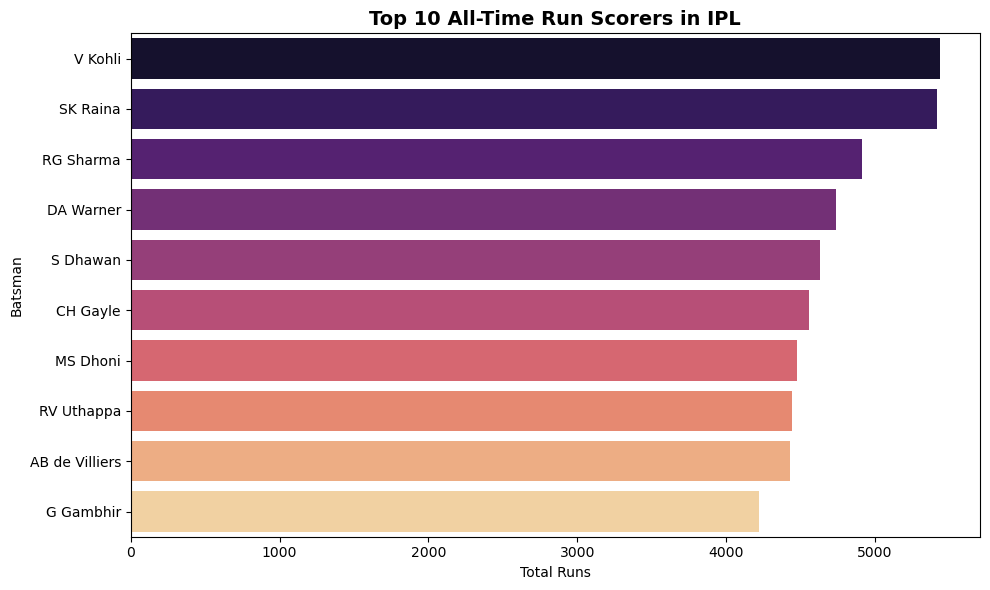

In [2]:
# 🏏 Highest Run-Scorer in IPL History
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Calculate total runs by each batsman
batsman_runs = (
    deliveries.groupby('batsman')['batsman_runs']
    .sum()
    .reset_index()
    .sort_values(by='batsman_runs', ascending=False)
)

# Step 2: Display top 10 batsmen
print("🏏 Top 10 All-Time Run Scorers in IPL:")
print(batsman_runs.head(10))

# Step 3: Show highest run-scorer
top_batsman = batsman_runs.iloc[0]
print(f"\n🏆 Highest Run-Scorer: {top_batsman['batsman']} — {top_batsman['batsman_runs']} runs")

# Step 4: Plot top 10 batsmen
plt.figure(figsize=(10,6))
sns.barplot(
    data=batsman_runs.head(10),
    x='batsman_runs',
    y='batsman',
    palette='magma'
)
plt.title("Top 10 All-Time Run Scorers in IPL", fontsize=14, weight='bold')
plt.xlabel("Total Runs")
plt.ylabel("Batsman")
plt.tight_layout()
plt.show()


🔹 Who has the most centuries and most fifties?

In [3]:
# 🏏 Most Centuries and Fifties in IPL
import pandas as pd
if not {'match_id', 'batsman', 'batsman_runs'}.issubset(deliveries.columns):
    raise ValueError("Required columns missing in the dataset!")
match_scores = deliveries.groupby(['match_id', 'batsman'])['batsman_runs'].sum().reset_index()

# Step 2: Identify 50s and 100s
match_scores['fifty'] = match_scores['batsman_runs'].apply(lambda x: 1 if 50 <= x < 100 else 0)
match_scores['century'] = match_scores['batsman_runs'].apply(lambda x: 1 if x >= 100 else 0)
player_stats = (
    match_scores.groupby('batsman')[['fifty', 'century']]
    .sum()
    .reset_index()
    .sort_values(by='century', ascending=False)
)
top_centuries = player_stats.sort_values('century', ascending=False).head(5)
top_fifties = player_stats.sort_values('fifty', ascending=False).head(5)

print("🏆 Top 5 Players with Most Centuries in IPL:")
print(top_centuries[['batsman', 'century']])

print("\n🔥 Top 5 Players with Most Fifties in IPL:")
print(top_fifties[['batsman', 'fifty']])


🏆 Top 5 Players with Most Centuries in IPL:
            batsman  century
92         CH Gayle        7
486         V Kohli        5
112       DA Warner        4
444       SR Watson        4
26   AB de Villiers        3

🔥 Top 5 Players with Most Fifties in IPL:
       batsman  fifty
112  DA Warner     44
428   SK Raina     38
486    V Kohli     38
392   S Dhawan     37
147  G Gambhir     36


🔹 Who scored the fastest century and fastest fifty?


In [4]:
import pandas as pd

deliveries['batsman_runs_cumsum'] = deliveries.groupby(['match_id', 'batsman'])['batsman_runs'].cumsum()
deliveries['ball_number'] = deliveries.groupby(['match_id', 'batsman']).cumcount() + 1

milestones = deliveries[deliveries['batsman_runs_cumsum'].isin([50, 100])]

milestone_summary = (
    milestones.groupby(['match_id', 'batsman', 'batsman_runs_cumsum'])
    .agg({'ball_number': 'min'})
    .reset_index()
)

fastest_fifty = (
    milestone_summary[milestone_summary['batsman_runs_cumsum'] == 50]
    .sort_values('ball_number')
    .head(5)
)

fastest_century = (
    milestone_summary[milestone_summary['batsman_runs_cumsum'] == 100]
    .sort_values('ball_number')
    .head(5)
)

print("⚡ Fastest Fifty in IPL History:")
print(fastest_fifty[['batsman', 'ball_number']])

print("\n🔥 Fastest Century in IPL History:")
print(fastest_century[['batsman', 'ball_number']])


⚡ Fastest Fifty in IPL History:
          batsman  ball_number
405     YK Pathan           15
39      SP Narine           17
542     SP Narine           17
329      CH Gayle           17
142  AC Gilchrist           18

🔥 Fastest Century in IPL History:
            batsman  ball_number
146       YK Pathan           40
33        DA Warner           44
61     AC Gilchrist           44
522  AB de Villiers           44
59        A Symonds           49


🔹 Which player has the most sixes and most fours?

In [5]:
import pandas as pd

most_sixes = (
    deliveries[deliveries['batsman_runs'] == 6]
    .groupby('batsman')
    .size()
    .reset_index(name='sixes')
    .sort_values('sixes', ascending=False)
    .head(5)
)

most_fours = (
    deliveries[deliveries['batsman_runs'] == 4]
    .groupby('batsman')
    .size()
    .reset_index(name='fours')
    .sort_values('fours', ascending=False)
    .head(5)
)

print("💥 Top 5 Players with Most Sixes in IPL:")
print(most_sixes)

print("\n🏏 Top 5 Players with Most Fours in IPL:")
print(most_fours)


💥 Top 5 Players with Most Sixes in IPL:
            batsman  sixes
59         CH Gayle    327
12   AB de Villiers    214
193        MS Dhoni    207
278        SK Raina    195
240       RG Sharma    194

🏏 Top 5 Players with Most Fours in IPL:
       batsman  fours
317   S Dhawan    526
343   SK Raina    495
120  G Gambhir    492
387    V Kohli    482
89   DA Warner    459


 🔹Who scored the most runs in death overs (16–20)? (Finisher analysis)

🔥 Top 1 Finishers (Most Runs in Death Overs 16–20):
      batsman  batsman_runs
265  MS Dhoni          2669


C:\Users\rajsa\AppData\Local\Temp\ipykernel_8692\3306055746.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


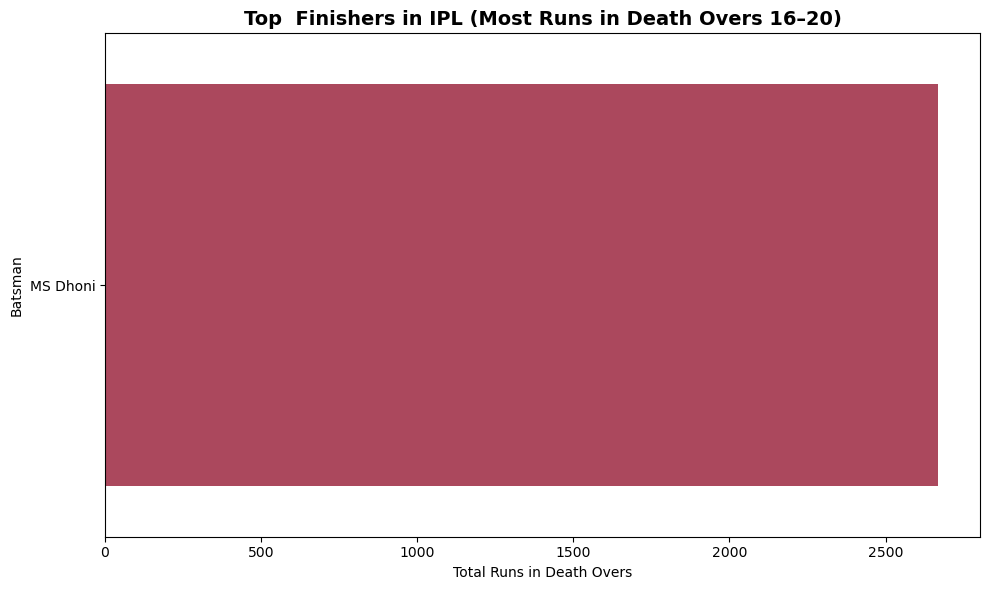

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

death_overs = deliveries[(deliveries['over'] >= 16) & (deliveries['over'] <= 20)]

finisher_runs = (
    death_overs.groupby('batsman')['batsman_runs']
    .sum()
    .reset_index()
    .sort_values('batsman_runs', ascending=False)
    .head(1)
)

print("🔥 Top 1 Finishers (Most Runs in Death Overs 16–20):")
print(finisher_runs)

plt.figure(figsize=(10,6))
sns.barplot(
    data=finisher_runs,
    x='batsman_runs',
    y='batsman',
    palette='inferno'
)
plt.title("Top  Finishers in IPL (Most Runs in Death Overs 16–20)", fontsize=14, weight='bold')
plt.xlabel("Total Runs in Death Overs")
plt.ylabel("Batsman")
plt.tight_layout()
plt.show()


 # 🎯 B. Bowling Performance Questions


🎳 Who is the highest wicket-taker of all time?

🎳 Top 10 Wicket-Takers in IPL History:
              bowler  wickets
290       SL Malinga      170
6           A Mishra      156
110  Harbhajan Singh      150
227        PP Chawla      149
82          DJ Bravo      147
46           B Kumar      133
232         R Ashwin      125
296        SP Narine      122
326         UT Yadav      119
244        RA Jadeja      108


C:\Users\rajsa\AppData\Local\Temp\ipykernel_8692\2620301731.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


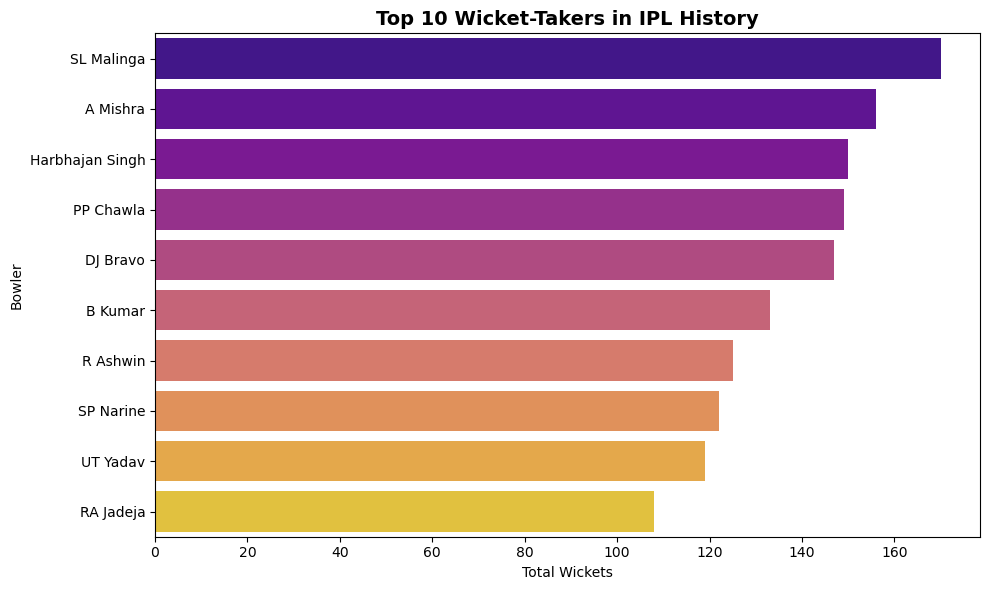

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

wickets = deliveries[
    deliveries['dismissal_kind'].isin(
        ['bowled', 'caught', 'lbw', 'stumped', 'caught and bowled', 'hit wicket']
    )
]

top_wicket_takers = (
    wickets.groupby('bowler')
    .size()
    .reset_index(name='wickets')
    .sort_values('wickets', ascending=False)
    .head(10)
)

print("🎳 Top 10 Wicket-Takers in IPL History:")
print(top_wicket_takers)

plt.figure(figsize=(10,6))
sns.barplot(
    data=top_wicket_takers,
    x='wickets',
    y='bowler',
    palette='plasma'
)
plt.title("Top 10 Wicket-Takers in IPL History", fontsize=14, weight='bold')
plt.xlabel("Total Wickets")
plt.ylabel("Bowler")
plt.tight_layout()
plt.show()


🎳 Which bowler has the most 4-wicket & 5-wicket hauls?


In [8]:
import pandas as pd

# Count wickets per bowler per match
valid_wickets = deliveries[
    deliveries['dismissal_kind'].isin(
        ['bowled', 'caught', 'lbw', 'stumped', 'caught and bowled', 'hit wicket']
    )
]

bowler_match_wkts = (
    valid_wickets.groupby(['match_id', 'bowler'])
    .size()
    .reset_index(name='wickets')
)

# Count how many times each bowler took 4 or 5 wickets
bowler_hauls = bowler_match_wkts.copy()
bowler_hauls['four_wicket'] = bowler_hauls['wickets'].apply(lambda x: 1 if x == 4 else 0)
bowler_hauls['five_wicket'] = bowler_hauls['wickets'].apply(lambda x: 1 if x >= 5 else 0)

haul_summary = (
    bowler_hauls.groupby('bowler')[['four_wicket', 'five_wicket']]
    .sum()
    .reset_index()
    .sort_values(by=['five_wicket', 'four_wicket'], ascending=False)
)

print("🎳 Bowlers with Most 4-Wicket and 5-Wicket Hauls in IPL:")
print(haul_summary.head(10))


🎳 Bowlers with Most 4-Wicket and 5-Wicket Hauls in IPL:
          bowler  four_wicket  five_wicket
140  JP Faulkner            1            2
129   JD Unadkat            0            2
290   SL Malinga            6            1
296    SP Narine            6            1
6       A Mishra            3            1
29        AJ Tye            3            1
166     L Balaji            3            1
244    RA Jadeja            3            1
5       A Kumble            2            1
46       B Kumar            2            1


 🎳 Who has the best bowling figures in an IPL match?

🎯 Top 10 Best Bowling Figures in IPL History:
      match_id         bowler  runs_conceded  wickets
579         83  Sohail Tanvir             15        6
4782     11310       A Joseph             18        6
4109       616        A Zampa             19        6
795        119       A Kumble              6        5
1615       238     SL Malinga             13        5
1783       265       I Sharma             13        5
2103       313      RA Jadeja             16        5
4417      7918     AS Rajpoot             16        5
666         98       A Mishra             17        5
84          13         AJ Tye             18        5


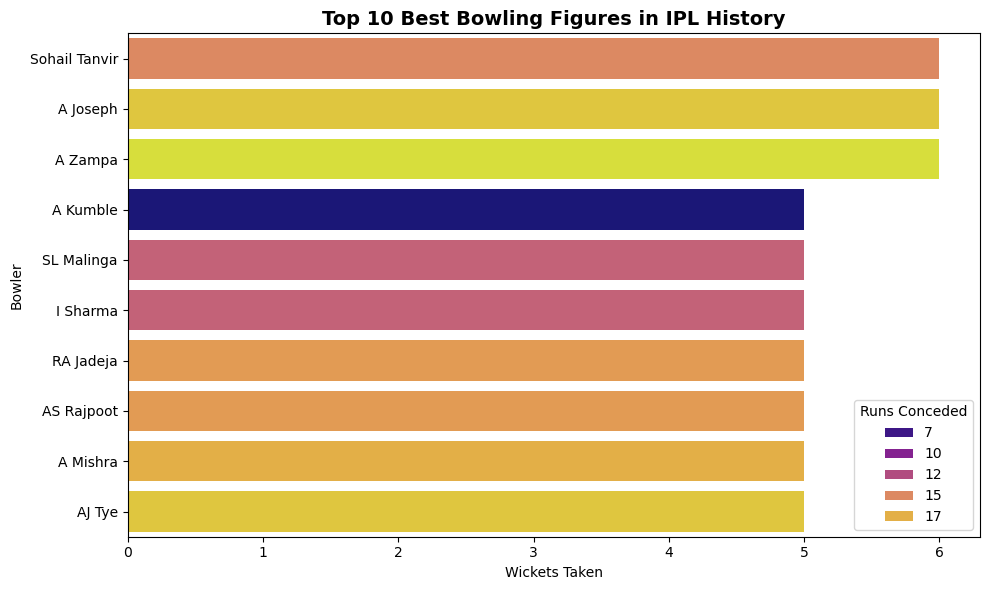

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

valid_wickets = deliveries[
    deliveries['dismissal_kind'].isin(
        ['bowled', 'caught', 'lbw', 'stumped', 'caught and bowled', 'hit wicket']
    )
]

runs_per_match = (
    deliveries.groupby(['match_id', 'bowler'])['total_runs']
    .sum()
    .reset_index(name='runs_conceded')
)

wickets_per_match = (
    valid_wickets.groupby(['match_id', 'bowler'])
    .size()
    .reset_index(name='wickets')
)

bowling_figures = pd.merge(runs_per_match, wickets_per_match, on=['match_id', 'bowler'], how='inner')

best_figures = (
    bowling_figures.sort_values(by=['wickets', 'runs_conceded'], ascending=[False, True])
    .head(10)
)

print("🎯 Top 10 Best Bowling Figures in IPL History:")
print(best_figures)

plt.figure(figsize=(10,6))
sns.barplot(
    data=best_figures,
    x='wickets',
    y='bowler',
    hue='runs_conceded',
    dodge=False,
    palette='plasma'
)
plt.title("Top 10 Best Bowling Figures in IPL History", fontsize=14, weight='bold')
plt.xlabel("Wickets Taken")
plt.ylabel("Bowler")
plt.legend(title='Runs Conceded')
plt.tight_layout()
plt.show()


🎳 Who took the most wickets in powerplay (overs 1–6)?


🎯 Top 10 Bowlers with Most Wickets in Powerplay (Overs 1–6):
             bowler  wickets
237          Z Khan       52
31          B Kumar       46
223        UT Yadav       45
62      DS Kulkarni       44
76         I Sharma       43
212  Sandeep Sharma       43
151         P Kumar       40
6           A Nehra       40
201      SL Malinga       37
121        M Morkel       36


C:\Users\rajsa\AppData\Local\Temp\ipykernel_8692\2250672259.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


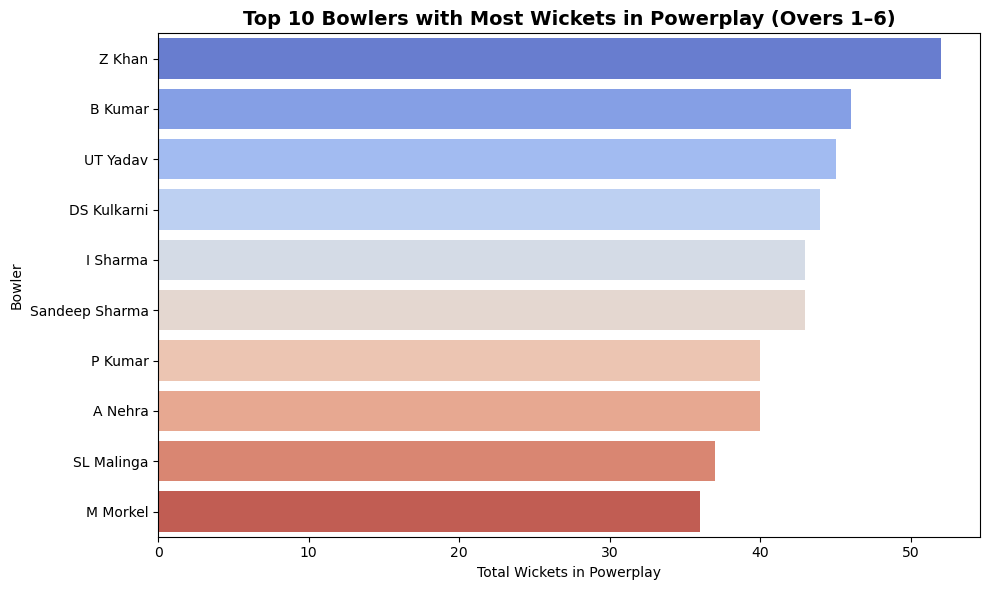

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

powerplay = deliveries[(deliveries['over'] >= 1) & (deliveries['over'] <= 6)]

valid_wickets = powerplay[
    powerplay['dismissal_kind'].isin(
        ['bowled', 'caught', 'lbw', 'stumped', 'caught and bowled', 'hit wicket']
    )
]

powerplay_wickets = (
    valid_wickets.groupby('bowler')
    .size()
    .reset_index(name='wickets')
    .sort_values('wickets', ascending=False)
    .head(10)
)

print("🎯 Top 10 Bowlers with Most Wickets in Powerplay (Overs 1–6):")
print(powerplay_wickets)

plt.figure(figsize=(10,6))
sns.barplot(
    data=powerplay_wickets,
    x='wickets',
    y='bowler',
    palette='coolwarm'
)
plt.title("Top 10 Bowlers with Most Wickets in Powerplay (Overs 1–6)", fontsize=14, weight='bold')
plt.xlabel("Total Wickets in Powerplay")
plt.ylabel("Bowler")
plt.tight_layout()
plt.show()


🎳 Which bowler dismissed Virat Kohli or Dhoni the most times?


In [11]:
import pandas as pd

target_batsmen = ['V Kohli', 'MS Dhoni']

dismissals = deliveries[
    deliveries['player_dismissed'].isin(target_batsmen)
]

bowler_vs_batsman = (
    dismissals.groupby(['player_dismissed', 'bowler'])
    .size()
    .reset_index(name='times_dismissed')
    .sort_values(['player_dismissed', 'times_dismissed'], ascending=[True, False])
)

for batsman in target_batsmen:
    top_dismisser = (
        bowler_vs_batsman[bowler_vs_batsman['player_dismissed'] == batsman]
        .head(5)
    )
    print(f"\n🎳 Bowlers Who Dismissed {batsman} the Most Times:")
    print(top_dismisser[['bowler', 'times_dismissed']])



🎳 Bowlers Who Dismissed V Kohli the Most Times:
             bowler  times_dismissed
76          A Nehra                6
157  Sandeep Sharma                5
98      DS Kulkarni                4
126  MJ McClenaghan                4
78         AB Dinda                3

🎳 Bowlers Who Dismissed MS Dhoni the Most Times:
        bowler  times_dismissed
44     PP Ojha                7
73      Z Khan                7
23   JJ Bumrah                3
26  KA Pollard                3
64   SR Watson                3


 # 🏆 C. Team & Match Analysis

🏟️ Which team has won the most matches overall?

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

team_wins = (
    matches['winner']
    .value_counts()
    .reset_index()
    .rename(columns={'index': 'team', 'winner': 'wins'})
)

print(" Teams with Most Wins in IPL History:")
print(team_wins)

plt.figure(figsize=(10,6))
sns.barplot(
    data=team_wins,
    x='wins',
    y='team',
    palette='crest'
)



🏆 Teams with Most Wins in IPL History:
                           wins  count
0                Mumbai Indians    144
1           Chennai Super Kings    138
2         Kolkata Knight Riders    131
3   Royal Challengers Bangalore    116
4              Rajasthan Royals    112
5           Sunrisers Hyderabad     88
6               Kings XI Punjab     88
7              Delhi Daredevils     67
8                Delhi Capitals     48
9               Deccan Chargers     29
10               Gujarat Titans     28
11                 Punjab Kings     24
12         Lucknow Super Giants     24
13                Gujarat Lions     13
14                Pune Warriors     12
15       Rising Pune Supergiant     10
16  Royal Challengers Bengaluru      7
17         Kochi Tuskers Kerala      6
18      Rising Pune Supergiants      5


ValueError: Could not interpret value `team` for `y`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

🏟️ Which team has the best win percentage per season?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

matches_played = (
    pd.concat([
        matches[['season', 'team1']].rename(columns={'team1': 'team'}),
        matches[['season', 'team2']].rename(columns={'team2': 'team'})
    ])
    .groupby(['season', 'team'])
    .size()
    .reset_index(name='matches_played')
)

matches_won = (
    matches.groupby(['season', 'winner'])
    .size()
    .reset_index(name='wins')
    .rename(columns={'winner': 'team'})
)

season_stats = pd.merge(matches_played, matches_won, on=['season', 'team'], how='left').fillna(0)
season_stats['win_percentage'] = (season_stats['wins'] / season_stats['matches_played']) * 100

best_per_season = (
    season_stats.sort_values(['season', 'win_percentage'], ascending=[True, False])
    .groupby('season')
    .head(1)
    .reset_index(drop=True)
)

final_matches = matches.dropna(subset=['winner']).sort_values(['season'])
final_matches = final_matches.drop_duplicates(subset=['season'], keep='last')
titles = final_matches['winner'].value_counts().reset_index()
titles.columns = ['team', 'titles']

final_summary = pd.merge(best_per_season, titles, on='team', how='left').fillna(0)
final_summary['titles'] = final_summary['titles'].astype(int)

print("🏆 Best Win Percentage per Season + Total Titles:")
print(final_summary[['season', 'team', 'win_percentage', 'titles']])

plt.figure(figsize=(10,6))
sns.barplot(data=final_summary, x='season', y='win_percentage', hue='team', dodge=False, palette='mako')
plt.title("🏟️ Best Win Percentage per IPL Season + Total Titles", fontsize=14, weight='bold')
plt.xlabel("Season")
plt.ylabel("Win Percentage (%)")
plt.legend(title='Team', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()

print("\n🏆 Total IPL Titles by Team:")
print(titles)


🏟️ Which team has the highest score?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

team_scores = (
    deliveries.groupby(['match_id', 'batting_team'])['total_runs']
    .sum()
    .reset_index()
)

highest_scores = team_scores.sort_values('total_runs', ascending=False).head(10)

print("🏏 Top  Highest Team Scores in IPL History:")
print(highest_scores)

plt.figure(figsize=(10,6))
sns.barplot(data=highest_scores, x='total_runs', y='batting_team', palette='rocket')
plt.title("🏟️ Top 10 Highest Team Scores in IPL History", fontsize=14, weight='bold')
plt.xlabel("Total Runs in an Innings")
plt.ylabel("Team")
plt.tight_layout()
plt.show()


🏟️ Which team has the lowest score?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

team_scores = (
    deliveries.groupby(['match_id', 'batting_team'])['total_runs']
    .sum()
    .reset_index()
)

lowest_scores = team_scores.sort_values('total_runs', ascending=True).head(1)

print("😬 Lowest Team Scores in IPL History:")
print(lowest_scores)

plt.figure(figsize=(10,6))
sns.barplot(data=lowest_scores, x='total_runs', y='batting_team', palette='coolwarm')
plt.title("🏟️ Top 10 Lowest Team Scores in IPL History", fontsize=14, weight='bold')
plt.xlabel("Total Runs in an Innings")
plt.ylabel("Team")
plt.tight_layout()
plt.show()


🏟️ Which team has the highest win % at home stadium?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

home_matches = matches[matches['team1'] == matches['toss_winner']]
home_wins = matches[matches['winner'] == matches['team1']]

home_stats = (
    matches.groupby('team1')
    .agg(
        home_matches=('team1', 'count'),
        home_wins=('winner', lambda x: (x == x.name).sum())
    )
    .reset_index()
)

home_stats['win_percentage'] = (home_stats['home_wins'] / home_stats['home_matches']) * 100
home_stats = home_stats.sort_values('win_percentage', ascending=False)

print("🏟️ Teams with Highest Win Percentage at Home Stadium:")
print(home_stats[['team1', 'home_wins', 'home_matches', 'win_percentage']])

plt.figure(figsize=(10,6))
sns.barplot(data=home_stats, x='win_percentage', y='team1', palette='crest')
plt.title("🏠 Highest Win Percentage at Home Stadium (IPL)", fontsize=14, weight='bold')
plt.xlabel("Home Win Percentage (%)")
plt.ylabel("Team")
plt.tight_layout()
plt.show()


🏟️ Which team had the most toss wins in a season?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

toss_wins = (
    matches.groupby(['season', 'toss_winner'])
    .size()
    .reset_index(name='toss_wins')
)

top_toss_per_season = (
    toss_wins.sort_values(['season', 'toss_wins'], ascending=[True, False])
    .groupby('season')
    .head(1)
)

print("🏏 Teams with Most Toss Wins per Season:")
print(top_toss_per_season[['season', 'toss_winner', 'toss_wins']])

plt.figure(figsize=(10,6))
sns.barplot(data=top_toss_per_season, x='season', y='toss_wins', hue='toss_winner', dodge=False, palette='magma')
plt.title("🏟️ Most Toss Wins by Team per IPL Season", fontsize=14, weight='bold')
plt.xlabel("Season")
plt.ylabel("Toss Wins")
plt.legend(title='Team', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()


 # 💥 D. Player vs Player

⚔️ Which bowler dismissed a certain batsman most often?

In [ ]:
import pandas as pd

batsman_name = "V Kohli"  # 🔹 change this to any batsman you want

dismissals = deliveries[deliveries['player_dismissed'] == batsman_name]

bowler_vs_batsman = (
    dismissals.groupby('bowler')
    .size()
    .reset_index(name='times_dismissed')
    .sort_values('times_dismissed', ascending=False)
)

print(f"⚔️ Bowlers Who Dismissed {batsman_name} Most Often:")
print(bowler_vs_batsman.head(10))


⚔️ Which batsman scored most runs off a single bowler?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

batsman_bowler_runs = (
    deliveries.groupby(['batsman', 'bowler'])['batsman_runs']
    .sum()
    .reset_index()
    .sort_values('batsman_runs', ascending=False)
)

top_pairs = batsman_bowler_runs.head(10)

print("⚔️ Top 10 Batsman vs Bowler Run Totals in IPL:")
print(top_pairs)

plt.figure(figsize=(10,6))
sns.barplot(data=top_pairs, x='batsman_runs', y='batsman', hue='bowler', dodge=False, palette='inferno')
plt.title("⚔️ Most Runs by a Batsman off a Single Bowler (IPL History)", fontsize=14, weight='bold')
plt.xlabel("Total Runs Scored")
plt.ylabel("Batsman")
plt.legend(title="Bowler", bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()


⚔️ Which bowler conceded most sixes/fours to one batsman?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fours_sixes = deliveries[deliveries['batsman_runs'].isin([4,6])]

bowler_conceded = (
    fours_sixes.groupby(['batsman', 'bowler', 'batsman_runs'])
    .size()
    .reset_index(name='count')
)

most_fours = (
    bowler_conceded[bowler_conceded['batsman_runs'] == 4]
    .sort_values('count', ascending=False)
    .head(10)
)

most_sixes = (
    bowler_conceded[bowler_conceded['batsman_runs'] == 6]
    .sort_values('count', ascending=False)
    .head(10)
)

print("💥 Top 10 Bowler-Batsman Pairs (Most Sixes Conceded):")
print(most_sixes[['batsman', 'bowler', 'count']])

print("\n🏏 Top 10 Bowler-Batsman Pairs (Most Fours Conceded):")
print(most_fours[['batsman', 'bowler', 'count']])

plt.figure(figsize=(10,6))
sns.barplot(data=most_sixes, x='count', y='batsman', hue='bowler', dodge=False, palette='flare')
plt.title("💥 Most Sixes by a Batsman off a Single Bowler (IPL History)", fontsize=14, weight='bold')
plt.xlabel("Number of Sixes")
plt.ylabel("Batsman")
plt.legend(title="Bowler", bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()


 # 🌍 E. Venue Analysis

🏟️ Which stadium hosts most matches?

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# build venue counts reliably
venue_counts = matches['venue'].value_counts().rename_axis('venue').reset_index(name='matches_hosted')
venue_counts = venue_counts.sort_values('matches_hosted', ascending=False).reset_index(drop=True)

# show top 10 venues
top10 = venue_counts.head(10)
print("🏟️ Top 10 Stadiums Hosting the Most IPL Matches:")
print(top10)

# plot
plt.figure(figsize=(10,6))
sns.barplot(data=top10, x='matches_hosted', y='venue', palette='mako')
plt.title("🏟️ Top 10 Stadiums by Matches Hosted", fontsize=14, weight='bold')
plt.xlabel("Matches Hosted")
plt.ylabel("Stadium")
plt.tight_layout()
plt.show()


🏟️ Which team is most successful at each stadium?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

venue_team_wins = (
    matches.groupby(['venue', 'winner'])
    .size()
    .reset_index(name='wins')
)

best_team_per_venue = (
    venue_team_wins.sort_values(['venue', 'wins'], ascending=[True, False])
    .groupby('venue')
    .head(1)
    .reset_index(drop=True)
    .sort_values('wins', ascending=False)
)

print("🏟️ Most Successful Team at Each Stadium:")
print(best_team_per_venue.head(10))

plt.figure(figsize=(10,6))
sns.barplot(data=best_team_per_venue.head(10), x='wins', y='venue', hue='winner', dodge=False, palette='mako')
plt.title("🏟️ Most Successful Teams at IPL Stadiums", fontsize=14, weight='bold')
plt.xlabel("Wins at Stadium")
plt.ylabel("Stadium")
plt.legend(title='Team', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()


1. Match-Winner Prediction (Team vs Team)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

df = matches.copy()
df = df.dropna(subset=['winner'])
df = df[['toss_winner', 'toss_decision', 'venue', 'team1', 'team2', 'winner']]

le = LabelEncoder()
for c in df.columns:
    df[c] = le.fit_transform(df[c])

X = df.drop('winner', axis=1)
y = df['winner']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

pred = model.predict(X_test)
print("🏏 Match-Winner Prediction Accuracy:", round(accuracy_score(y_test, pred)*100, 2), "%")


⚾ 2. First-Innings Score Prediction

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

innings = (
    deliveries.groupby(['match_id', 'inning', 'batting_team'])
    .agg({'total_runs': 'sum', 'over': 'max'})
    .reset_index()
)
innings = innings[innings['inning'] == 1]

X = innings[['over']]
y = innings['total_runs']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression().fit(X_train, y_train)

pred = model.predict(X_test)
print("⚡ R² Score:", round(r2_score(y_test, pred), 3))
